In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Vamshi\Desktop\custommodels\CVRUsecases\InvenManagementSystem\dataset\Maternal Health Risk Data Set.csv')

In [3]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df = df.drop(columns='RiskLevel',axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


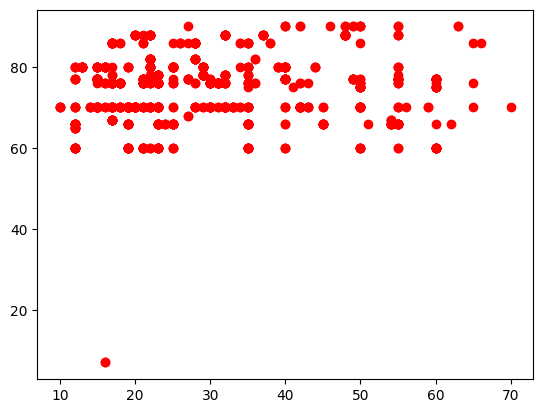

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['HeartRate'],color='red')

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [14]:
predictions

array([-1,  1,  1, ..., -1,  1,  1])

In [15]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   0,    7,   19,   20,   34,   35,  105,  108,  110,  111,  114,
         117,  123,  124,  130,  131,  166,  167,  179,  180,  191,  210,
         232,  239,  248,  262,  263,  275,  276,  287,  317,  319,  326,
         337,  338,  339,  340,  341,  362,  363,  370,  371,  382,  413,
         416,  417,  419,  422,  426,  428,  432,  435,  442,  458,  471,
         482,  486,  499,  502,  505,  506,  535,  538,  539,  551,  552,
         583,  584,  596,  613,  631,  640,  644,  658,  661,  670,  679,
         683,  689,  787,  789,  848,  849,  908,  910,  928,  939,  940,
         955,  961,  962,  970,  976,  982,  988,  992,  994,  995, 1000,
        1005, 1010, 1011], dtype=int64),)

In [16]:
X = df.values

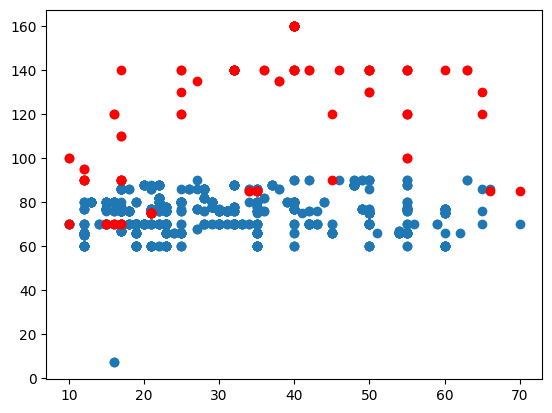

In [18]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

## DBSCAN

In [1]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)

In [3]:
X

array([[-0.23762938, -0.35743846],
       [ 0.42316175, -0.94557523],
       [-0.70339147,  0.76097081],
       ...,
       [-0.29381198,  0.08557158],
       [-0.78947071,  0.4974002 ],
       [ 0.11298283,  0.25396486]])

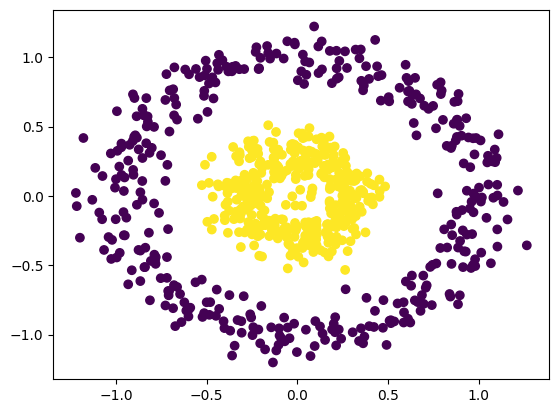

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)

In [6]:
dbscan.fit_predict(X)

array([ 0,  1, 11,  0,  0,  2,  2,  1,  0,  1,  3,  0,  3,  0,  0,  0,  0,
        0,  9,  0,  0,  1,  0,  4,  0,  0,  0,  0,  0, -1,  0,  0,  5,  0,
        5,  6,  7,  0,  0,  1,  8,  0,  3,  0,  7,  0,  0, -1,  8,  1,  0,
        0,  5,  3,  0,  0,  0,  0,  0,  1,  6,  1,  0, -1,  2,  1,  8,  8,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  6,  2,  0, 11, -1,  0,
        9,  9,  9,  0,  0, -1, -1,  9,  0,  0,  0,  0,  0,  1,  0,  0, -1,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  9,  2,  6,  3,  0,  0,
        6,  0,  0, -1,  0,  0,  4,  0,  0,  0,  0,  6,  7,  1, -1,  5,  0,
        0,  2, -1,  0,  0,  0,  2,  0,  0,  9,  2,  5,  9,  0,  7,  4,  6,
        0,  0,  0,  0,  0,  1, -1,  2,  1,  5,  1,  0,  0,  1,  1,  0,  0,
        0,  0, -1,  6, -1,  0,  1,  8,  9,  2,  0,  1,  7,  0,  7,  3,  3,
        0,  9,  5,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1, 10,  1,  2,  0,  0,
        3,  1,  0,  9,  0

In [7]:
dbscan.labels_

array([ 0,  1, 11,  0,  0,  2,  2,  1,  0,  1,  3,  0,  3,  0,  0,  0,  0,
        0,  9,  0,  0,  1,  0,  4,  0,  0,  0,  0,  0, -1,  0,  0,  5,  0,
        5,  6,  7,  0,  0,  1,  8,  0,  3,  0,  7,  0,  0, -1,  8,  1,  0,
        0,  5,  3,  0,  0,  0,  0,  0,  1,  6,  1,  0, -1,  2,  1,  8,  8,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  6,  2,  0, 11, -1,  0,
        9,  9,  9,  0,  0, -1, -1,  9,  0,  0,  0,  0,  0,  1,  0,  0, -1,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  9,  2,  6,  3,  0,  0,
        6,  0,  0, -1,  0,  0,  4,  0,  0,  0,  0,  6,  7,  1, -1,  5,  0,
        0,  2, -1,  0,  0,  0,  2,  0,  0,  9,  2,  5,  9,  0,  7,  4,  6,
        0,  0,  0,  0,  0,  1, -1,  2,  1,  5,  1,  0,  0,  1,  1,  0,  0,
        0,  0, -1,  6, -1,  0,  1,  8,  9,  2,  0,  1,  7,  0,  7,  3,  3,
        0,  9,  5,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1, 10,  1,  2,  0,  0,
        3,  1,  0,  9,  0

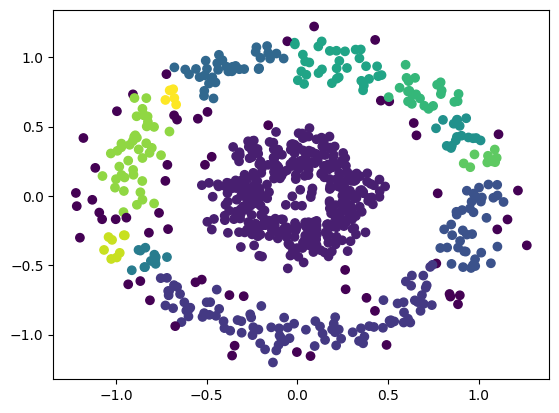

In [9]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

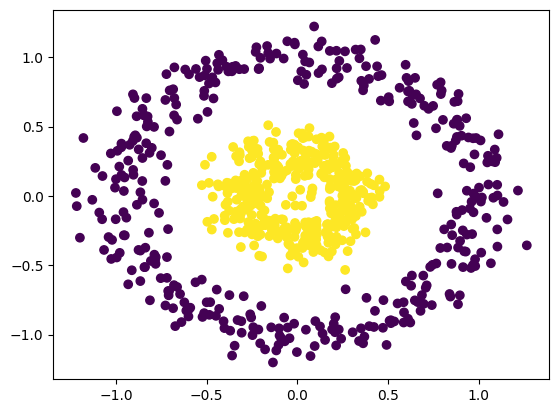

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
## Local outlier factors

## Local outlier factor 
There are two types of outliers:
1. Local outliers
2. Global outliers

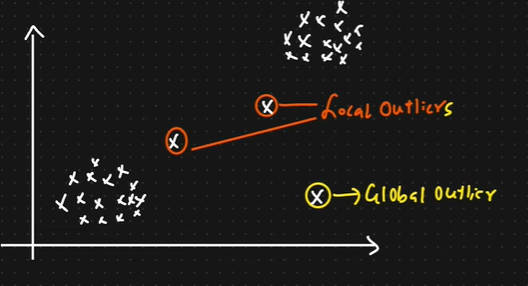

Local outlier factor with the help of K-Nearest Neighbors calculates the local density of a given point. If the local density is low, the point is a local outlier.

## Local outlier factors

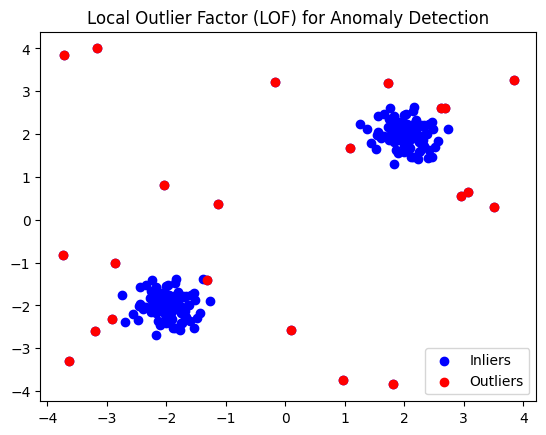

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()